<a href="https://colab.research.google.com/github/pouya-mhb/DS-ML-DL-Practices/blob/main/Thesis_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.base import clone
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.base import clone
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [67]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

# Dataset 1 : Turkish
## Ensemble Learning with classifiers

In [68]:
# Load the dataset
file_path = "/content/drive/MyDrive/Thesis-Project/Acoustic Features.csv"
df = pd.read_csv(file_path)

## Data Analysis of Turkish Music Dataset

In [69]:
df.head()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957


In [70]:
df.shape

(400, 51)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           400 non-null    object 
 1   _RMSenergy_Mean                                 400 non-null    float64
 2   _Lowenergy_Mean                                 400 non-null    float64
 3   _Fluctuation_Mean                               400 non-null    float64
 4   _Tempo_Mean                                     400 non-null    float64
 5   _MFCC_Mean_1                                    400 non-null    float64
 6   _MFCC_Mean_2                                    400 non-null    float64
 7   _MFCC_Mean_3                                    400 non-null    float64
 8   _MFCC_Mean_4                                    400 non-null    float64
 9   _MFCC_Mean_5                               

In [72]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (400, 51)


In [73]:
# Inspect data types
print("\nData Types:\n", df.dtypes)


Data Types:
 Class                                              object
_RMSenergy_Mean                                   float64
_Lowenergy_Mean                                   float64
_Fluctuation_Mean                                 float64
_Tempo_Mean                                       float64
_MFCC_Mean_1                                      float64
_MFCC_Mean_2                                      float64
_MFCC_Mean_3                                      float64
_MFCC_Mean_4                                      float64
_MFCC_Mean_5                                      float64
_MFCC_Mean_6                                      float64
_MFCC_Mean_7                                      float64
_MFCC_Mean_8                                      float64
_MFCC_Mean_9                                      float64
_MFCC_Mean_10                                     float64
_MFCC_Mean_11                                     float64
_MFCC_Mean_12                                     float64


In [74]:
# Descriptive statistics for numerical features
print("\nDescriptive Statistics:\n", df.describe())


Descriptive Statistics:
        _RMSenergy_Mean  _Lowenergy_Mean  _Fluctuation_Mean  _Tempo_Mean  \
count       400.000000       400.000000         400.000000   400.000000   
mean          0.134650         0.553605           7.145932   123.682020   
std           0.064368         0.050750           2.280145    34.234344   
min           0.010000         0.302000           3.580000    48.284000   
25%           0.085000         0.523000           5.859500   101.490250   
50%           0.128000         0.553000           6.734000   120.132500   
75%           0.174000         0.583250           7.823500   148.986250   
max           0.431000         0.703000          23.475000   195.026000   

       _MFCC_Mean_1  _MFCC_Mean_2  _MFCC_Mean_3  _MFCC_Mean_4  _MFCC_Mean_5  \
count    400.000000    400.000000    400.000000    400.000000    400.000000   
mean       2.456422      0.071890      0.488065      0.030465      0.178897   
std        0.799262      0.537865      0.294607      0.275839

In [75]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Class                                             0
_RMSenergy_Mean                                   0
_Lowenergy_Mean                                   0
_Fluctuation_Mean                                 0
_Tempo_Mean                                       0
_MFCC_Mean_1                                      0
_MFCC_Mean_2                                      0
_MFCC_Mean_3                                      0
_MFCC_Mean_4                                      0
_MFCC_Mean_5                                      0
_MFCC_Mean_6                                      0
_MFCC_Mean_7                                      0
_MFCC_Mean_8                                      0
_MFCC_Mean_9                                      0
_MFCC_Mean_10                                     0
_MFCC_Mean_11                                     0
_MFCC_Mean_12                                     0
_MFCC_Mean_13                                     0
_Roughness_Mean                               

In [76]:
# df.hist(figsize=(20,20))
# plt.show()

In [77]:
# Look for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 12


In [80]:
# Analyze the distribution of the target variable
print("\nTarget Variable Distribution:\n", df['Class'].value_counts())


Target Variable Distribution:
 Class
relax    100
happy    100
sad      100
angry    100
Name: count, dtype: int64


<ipython-input-81-da1e86a27726>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="viridis")


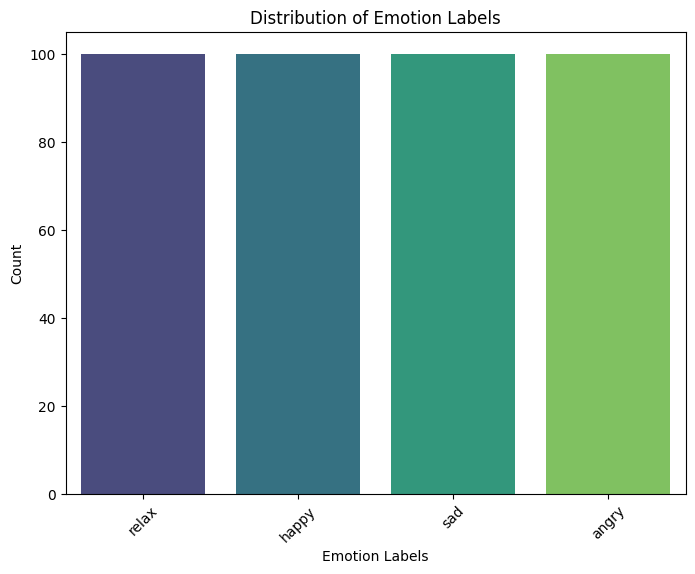

In [81]:
# Count occurrences of each emotion label
emotion_counts = df["Class"].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="viridis")
plt.xlabel("Emotion Labels")
plt.ylabel("Count")
plt.title("Distribution of Emotion Labels")
plt.xticks(rotation=45)
plt.show()


### Correlation matrix for features and emotions

In [82]:
# Encode the emotion labels as numerical values
label_encoder = LabelEncoder()
df["Class_Encoded"] = label_encoder.fit_transform(df["Class"])

In [83]:
df["Class_Encoded"].value_counts()

,count
Class_Encoded,
2,100
1,100
3,100
0,100


In [84]:
df.drop("Class", axis=1, inplace=True)

In [85]:
df.head()

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy,Class_Encoded
0,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,0.118,...,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970,2
1,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,0.799,...,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967,2
2,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,0.140,...,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963,2
3,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,0.143,...,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968,2
4,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,0.285,...,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957,2


In [86]:
# Compute the correlation matrix including the encoded emotion labels
correlation_matrix = df.corr()

# Extract correlations of the encoded emotion labels with other features
emotion_correlation = correlation_matrix["Class_Encoded"].drop("Class_Encoded")

# Display the correlation values
emotion_correlation.sort_values(ascending=False)

,Class_Encoded
_HarmonicChangeDetectionFunction_Std,0.658436
_AttackTime_Mean,0.378313
_MFCC_Mean_1,0.355162
_HarmonicChangeDetectionFunction_Mean,0.330568
_Chromagram_Mean_7,0.245723
_Fluctuation_Mean,0.242943
_Spectralskewness_Mean,0.207333
_Lowenergy_Mean,0.179905
_Spectralkurtosis_Mean,0.171512
_Chromagram_Mean_8,0.145647


In [87]:
correlation_matrix

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy,Class_Encoded
_RMSenergy_Mean,1.000000,-0.281123,-0.170943,0.001018,-0.196514,-0.004046,0.058838,0.021011,-0.057344,-0.026006,...,0.121314,0.134801,0.019755,-0.034969,-0.361005,-0.093959,0.138085,0.344589,0.017421,-0.295092
_Lowenergy_Mean,-0.281123,1.000000,0.051927,-0.041363,0.123084,0.128287,-0.064834,0.051065,0.017015,-0.011772,...,-0.028428,0.091553,-0.030245,0.036964,0.212803,0.219543,-0.105146,-0.204983,-0.057252,0.179905
_Fluctuation_Mean,-0.170943,0.051927,1.000000,-0.119922,0.077035,0.066078,-0.105724,0.052109,-0.049287,-0.125172,...,-0.130612,0.006006,-0.024852,0.228741,0.314950,0.079096,-0.044857,-0.237601,-0.024144,0.242943
_Tempo_Mean,0.001018,-0.041363,-0.119922,1.000000,-0.065000,0.092282,0.018257,0.037973,0.072675,0.066078,...,0.059773,0.021740,0.014066,-0.085568,-0.130662,-0.057506,0.016276,0.047717,0.103934,-0.050760
_MFCC_Mean_1,-0.196514,0.123084,0.077035,-0.065000,1.000000,0.020601,0.062331,0.035704,-0.095148,0.054577,...,-0.096281,-0.124380,-0.030001,-0.021792,0.415425,0.028937,-0.130964,-0.462958,-0.101777,0.355162
_MFCC_Mean_2,-0.004046,0.128287,0.066078,0.092282,0.020601,1.000000,0.030869,0.381396,0.182625,0.202743,...,0.011785,-0.099968,-0.027340,-0.053658,0.112911,0.148877,-0.040235,-0.145812,0.026345,0.045559
_MFCC_Mean_3,0.058838,-0.064834,-0.105724,0.018257,0.062331,0.030869,1.000000,0.185289,0.104706,0.119881,...,0.008456,-0.054242,0.010879,-0.165410,-0.074145,0.081755,-0.041077,-0.016337,-0.077185,-0.117374
_MFCC_Mean_4,0.021011,0.051065,0.052109,0.037973,0.035704,0.381396,0.185289,1.000000,0.274641,0.358204,...,0.059997,-0.082904,-0.029550,-0.082057,-0.021947,0.123147,-0.061776,0.014821,-0.111811,-0.067627
_MFCC_Mean_5,-0.057344,0.017015,-0.049287,0.072675,-0.095148,0.182625,0.104706,0.274641,1.000000,0.377629,...,0.004970,0.027684,0.028802,-0.082998,-0.105274,0.037048,0.028897,0.049388,0.000519,-0.044363
_MFCC_Mean_6,-0.026006,-0.011772,-0.125172,0.066078,0.054577,0.202743,0.119881,0.358204,0.377629,1.000000,...,0.070623,-0.030072,-0.087576,-0.119089,-0.081203,-0.011480,-0.044954,0.049903,-0.088279,-0.047221


### Feature Importance Calculation and Feature Selection
Create a new dataset with selected features and emotion labels

In [88]:
# Separate features and emotion labels
X = df.iloc[:, :-1]  # All features
y = df.iloc[:, -1:]  # Emotion labels

In [89]:
X.head()

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,0.118,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,0.799,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,0.140,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,0.143,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,0.285,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957


In [90]:
y.head()

,Class_Encoded
0,2
1,2
2,2
3,2
4,2


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Reduced dataset saved as 'turkish_emotions_reduced.csv'


<ipython-input-93-60f1f3bf0933>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances[:20], y=sorted_features[:20], palette="viridis")


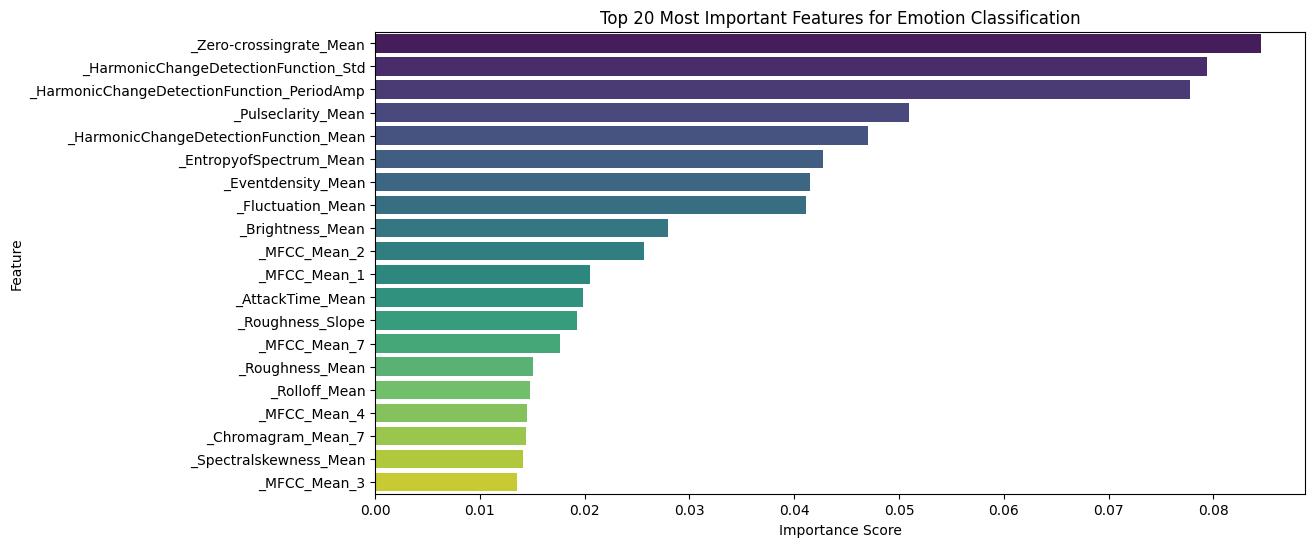

In [93]:
# Train a Random Forest model to determine feature importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Select top features based on importance threshold (top 20%)
threshold = np.percentile(feature_importances, 80)  # Keeping top 20% most important features
selected_features = X.columns[feature_importances >= threshold]

# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = X.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a new dataset with selected features and emotion labels
df_reduced = df[selected_features.tolist() + df.columns[-1:].tolist()]

# Save the reduced dataset
df_reduced.to_csv("emotions_reduced.csv", index=False)

print("Reduced dataset saved as 'turkish_emotions_reduced.csv'")

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_importances[:20], y=sorted_features[:20], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 20 Most Important Features for Emotion Classification")
plt.show()



## Ensemble Learning with Multiple Classifiers

In [95]:
# Load the reduced dataset
df_reduced = pd.read_csv("emotions_reduced.csv")

In [96]:
df_reduced.head()

,_Fluctuation_Mean,_MFCC_Mean_2,_Zero-crossingrate_Mean,_Eventdensity_Mean,_Pulseclarity_Mean,_Brightness_Mean,_EntropyofSpectrum_Mean,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_PeriodAmp,Class_Encoded
0,9.136,0.363,403.129,1.336,0.082,0.173,0.806,0.316,0.261,0.593,2
1,6.680,0.516,204.886,1.336,0.051,0.117,0.765,0.285,0.211,0.702,2
2,10.578,0.903,685.474,1.336,0.299,0.496,0.897,0.413,0.299,0.692,2
3,10.442,1.552,579.859,2.105,0.121,0.319,0.840,0.422,0.265,0.743,2
4,9.769,0.228,430.536,1.370,0.208,0.279,0.830,0.345,0.261,0.674,2


In [138]:
# # Separate features and target
# X = df.drop(columns=["Class_Encoded"])
# y = df["Class_Encoded"]

# Separate features and target
X = df_reduced.drop(columns=["Class_Encoded"])
y = df_reduced["Class_Encoded"]


In [139]:
X

,_Fluctuation_Mean,_MFCC_Mean_2,_Zero-crossingrate_Mean,_Eventdensity_Mean,_Pulseclarity_Mean,_Brightness_Mean,_EntropyofSpectrum_Mean,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_PeriodAmp
0,9.136,0.363,403.129,1.336,0.082,0.173,0.806,0.316,0.261,0.593
1,6.680,0.516,204.886,1.336,0.051,0.117,0.765,0.285,0.211,0.702
2,10.578,0.903,685.474,1.336,0.299,0.496,0.897,0.413,0.299,0.692
3,10.442,1.552,579.859,2.105,0.121,0.319,0.840,0.422,0.265,0.743
4,9.769,0.228,430.536,1.370,0.208,0.279,0.830,0.345,0.261,0.674
...,...,...,...,...,...,...,...,...,...,...
395,5.265,0.065,493.908,4.076,0.514,0.335,0.853,0.323,0.140,0.867
396,5.042,-0.148,975.308,3.687,0.589,0.482,0.902,0.233,0.127,0.879
397,4.724,0.566,916.985,2.940,0.077,0.526,0.891,0.269,0.157,0.819
398,4.470,-0.210,670.306,2.539,0.317,0.449,0.872,0.277,0.144,0.811


In [140]:
y

,Class_Encoded
0,2
1,2
2,2
3,2
4,2
...,...
395,0
396,0
397,0
398,0


In [141]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [147]:
# Define individual classifiers
clf1 = LogisticRegression(max_iter=1000, random_state=42)
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf3 = GradientBoostingClassifier(n_estimators=100, random_state=42)
clf4 = AdaBoostClassifier(n_estimators=100, random_state=42)
clf5 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

In [168]:
# training with optimized parameters for faster execution
clf6_xgb_model_optimized = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    n_estimators=100,  # Reduce the number of trees
    max_depth=3,       # Limit tree depth
    learning_rate=0.1, # Adjust learning rate
    subsample=0.8      # Use a fraction of data per tree
)

clf6_xgb_model_optimized.fit(X_train, y_train)

# Make predictions
y_pred_optimized = clf6_xgb_model_optimized.predict(X_test)

# Evaluate the model
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
report_optimized = classification_report(y_test, y_pred_optimized)

accuracy_optimized

clf6 = clf6_xgb_model_optimized

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:06:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [186]:
from sklearn.svm import SVC

# Initialize and train an SVM classifier with a radial basis function (RBF) kernel
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

clf7= svm_model

accuracy_svm

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.475

In [179]:
 # Create an ensemble using VotingClassifier with hard voting (majority vote)
ensemble_clf = VotingClassifier(estimators=[
    ('lr', clf1),
    ('rf', clf2),
    ('gb', clf3),
    ('ab', clf4),
    ('xb', clf5),
    ('opt-xb',clf6),
    # ('svm', clf7)
], voting='hard')

In [180]:
# Train the ensemble classifier
ensemble_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ensemble_clf.predict(X_test)

# Evaluate and print the classification performance
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:09:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:09:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.88      0.83      0.86        18
           1       0.85      0.94      0.89        18
           2       0.85      0.85      0.85        26
           3       0.65      0.61      0.63        18

    accuracy                           0.81        80
   macro avg       0.81      0.81      0.81        80
weighted avg       0.81      0.81      0.81        80



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:09:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:09:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


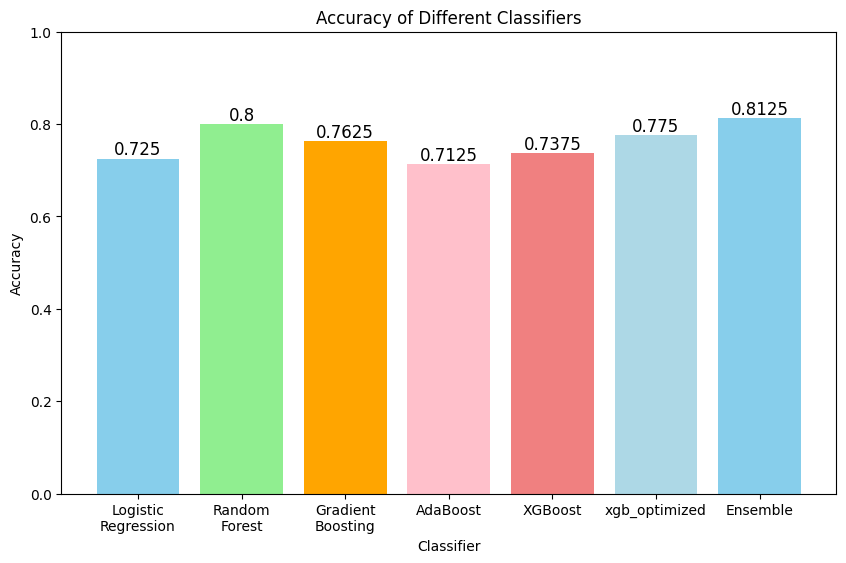

In [181]:
classifiers = {
    "Logistic\nRegression": clf1,
    "Random\nForest": clf2,
    "Gradient\nBoosting": clf3,
    "AdaBoost": clf4,
    "XGBoost" : clf5,
    "xgb_optimized" : clf6,
    # "SVM": clf,
    "Ensemble": ensemble_clf
}

accuracies = []
for name, clf in classifiers.items():
    # For the ensemble, we already have predictions (y_pred)
    if name == "Ensemble":
        y_pred_clf = y_pred
    else:
        # Fit the individual classifier before making predictions
        clf.fit(X_train, y_train)
        y_pred_clf = clf.predict(X_test)  # Predict for individual classifiers

    accuracies.append(accuracy_score(y_test, y_pred_clf))

plt.figure(figsize=(10, 6))
bars = plt.bar(classifiers.keys(), accuracies, color=['skyblue', 'lightgreen', 'orange', 'pink', 'lightcoral','lightblue'])

# Add text labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,  # X position (center of bar)
             bar.get_height(),                 # Y position (top of bar)
             str(bar.get_height()),            # Label (bar height)
             ha='center', va='bottom', fontsize=12)

plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Classifiers")
plt.ylim([0, 1])  # Set y-axis limits to 0-1 for accuracy
plt.show()

### Only XGBoost

# Dataset 2 : Emo 6	Multi-label
## Ensemble Learning with classifiers

# Dataset 3 : Spotify
## ??

# Dataset 4 : Emopia
## ??

# Dataset 5 : DEAM
## Emotional VA Clustering